## Import Libraries

In [1]:
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\aditj\anaconda.updated\envs\my-rdkit-env\lib\site-packages (0.23.2)


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

## Load the Dataset into a Dataframe

In [3]:
df = pd.read_csv('BetaAmyloidA4_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df = df.drop(columns = ['Name'])
df = df.dropna()
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.568636
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.100727
858,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.142668
859,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.081445
860,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.745936


## 3. Prepare the features and label

#### 3.1 Input features

In [4]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
859,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
860,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X.isnull().sum().sum()

0

#### 3.2 Label

In [6]:
Y = df.pIC50
Y

0      5.301030
1      5.568636
2      5.744727
3      4.958607
4      5.000000
         ...   
857    5.100727
858    5.142668
859    5.081445
860    4.745936
861    5.376751
Name: pIC50, Length: 861, dtype: float64

In [7]:
X.shape

(861, 881)

In [8]:
Y.shape

(861,)

#### Remove any potential low variance fingerprints to avoid repetition. 

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [10]:
X.shape

(861, 180)

There are still 881 columns in the dataframe, so no fingerprints were removed due to low variance. 

## Model Building

In [29]:
from sklearn.model_selection import GridSearchCV

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Random Forest Regression Model

In [25]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)
np.mean(cross_val_score(rf, X_train, Y_train, scoring = 'neg_mean_absolute_error'))

-0.5204339029394336

In [26]:
Y_predicted = rf.predict(X_test)

C:\Users\aditj\anaconda.updated\envs\my-rdkit-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

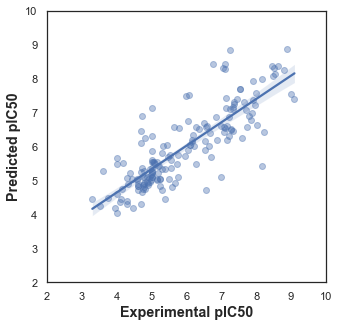

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_predicted, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 10)
ax.set_ylim(2, 10)
ax.figure.set_size_inches(5, 5)
plt.show

#### Hyperparameter Tuning

In [30]:
parameters = {'n_estimators': range(10,100,10), 'criterion': ('mse', 'mae'), 'max_features':('auto', 'sqrt', 'log2')}

grid_rf = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error')
grid_rf.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [31]:
grid_rf.best_score_

-0.5191951626086379

In [32]:
grid_rf.best_params_

{'criterion': 'mae', 'max_features': 'sqrt', 'n_estimators': 70}

### Linear Regression Model 

In [15]:
from sklearn.linear_model import LinearRegression, Lasso

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train, Y_train)

LinearRegression()

In [18]:
np.mean(cross_val_score(lr, X_train, Y_train, scoring = 'neg_mean_absolute_error'))

-43528726304.16099

In [19]:
Y_pred = lr.predict(X_test)

C:\Users\aditj\anaconda.updated\envs\my-rdkit-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

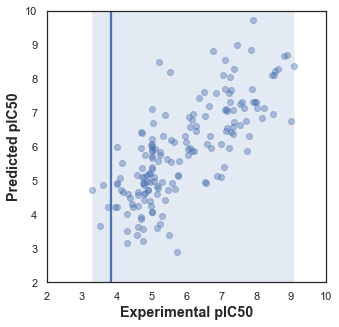

In [20]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 10)
ax.set_ylim(2, 10)
ax.figure.set_size_inches(5, 5)
plt.show

### Lasso Regression

In [21]:
lr_l = Lasso()
np.mean(cross_val_score(lr_l, X_train, Y_train, scoring = 'neg_mean_absolute_error'))

-1.1479272023875133

#### Hyperparameter Tuning

In [35]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lr_l, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=None)
grid_result = grid.fit(X_train, Y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

C:\Users\aditj\anaconda.updated\envs\my-rdkit-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.204794783589051, tolerance: 0.09996904338321216
  positive)
C:\Users\aditj\anaconda.updated\envs\my-rdkit-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8385231444600265, tolerance: 0.09673261958163094
  positive)
C:\Users\aditj\anaconda.updated\envs\my-rdkit-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9198611660495999, tolerance: 0.09871178355538172
  positive)
C:\Users\aditj\anaconda.updated\envs\my-rdkit-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: Co

Best Score:  -0.6603363189200728
Best Params:  {'alpha': 0.001}


C:\Users\aditj\anaconda.updated\envs\my-rdkit-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5866656644468549, tolerance: 0.12520060198918542
  positive)


### Decision Tree Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
dt = DecisionTreeRegressor()
np.mean(cross_val_score(dt, X_train, Y_train, scoring = 'neg_mean_absolute_error'))

-0.6417345722495739

## Results

Of the four regression models I fit to the data, the **Random Forest Regressor had the lowest mean absolute error**, meaning it was the most accurate model. The model originally had a MAE of -0.5204, but after tuning the parameters using GridSearchCV, the MAE **improved to -0.5191. 

